# 4. **신경망 학습**

신경망은 데이터로부터 학습된다. 가중치와 바이어스가 데이터를 통해 자동으로 결정된다.

신경망의 매개변수들은 많은 수의 데이터로부터 학습된다.

- 데이터 주도 학습

- 기계학습 : 컴퓨터 비전 분야에서 SIFT, HOG 등의 특징을 사용한다. 영상 데이터를 특징 벡터로 변환하고 변환된 벡터를 가지고 SVM, KNN 등의 학습을 수행한다.

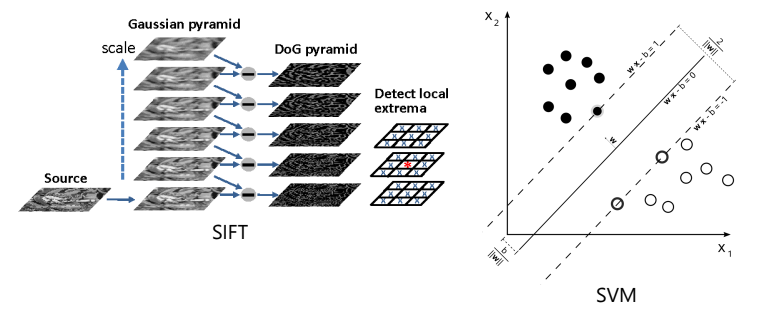

- 딥러닝 : 신경망 기반의 기계학습.입력 데이터부터 출력까지 사람의 개입 없이 수행된다. 신경망의 구조는 사람이 설계하지만 사용되는 모든 매개변수들은 데이터를 통해 학습된다.

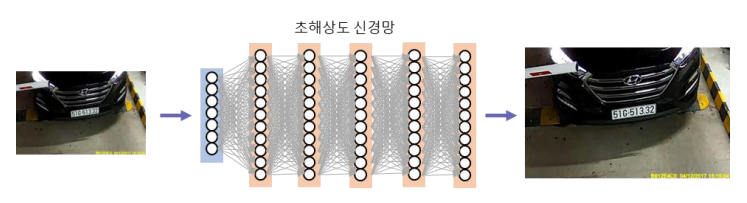

사람이 설계하는 알고리즘 -> 알고리즘을 완벽하게 짜기는 어려움

기계학습 -> 사람이 생각한 특징 -> 기계학습

딥러닝 -> 모든 과정이 학습을 통해 이루어짐

- 훈련 데이터(train) : 훈련 데이터의 학습을 통해최적의 매개변수를 찾는다.

- 시험 데이터(test) : 시험 데이터를 사용해서 훈련된 모델의 성능을 평가한다.

범용 능력(신경망이 아직 보지 못한 데이터, 즉 훈련 데이터에 포함되지 않은 데이터에 대한 성능)을 평가하기 위해서 데이터를 두 가지로 분리한다.

데이터셋 하나만 이용해서 학습과 평가를 수행하면 학습에 이용된 데이터셋에 대해서는 높은 성능을 보이더라도 다른 데이터셋에서는 성능이 높지 않을 수 있다. -> 올바른 성능 평가를 할 수 X

훈련 데이터셋에 지나치게 최적화된 상태 : **오버피팅(overfitting)**

오버피팅을 피하는 것이 기계 학습의 중요한 과제이다.

## 손실함수(Loss function)

신경망의 예측값과 실제값의 차이를 표현하는 지표

손실함수를 최소화 시키는 방향으로 매개변수를 찾는다.

- 오차제곱합, 엔트로피 오차

### 1) 오차제곱합

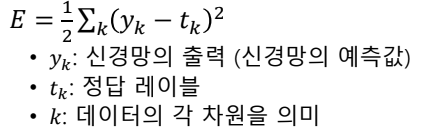

- 구현해보기

손글씨 숫자 인식 예시

각각은 '0', '1', '2',... 확률을 나타냄

정답 레이블에서 정답에 해당하는 한 원소만 1이고 나머지는 0이다(원핫인코딩)

In [1]:
# 예측값
y = [0.1, 0.05, 0.6, 0, 0.05, 0.1, 0, 0.1, 0, 0]
# 정답 레이블
t = [0,0,1,0,0,0,0,0,0,0]

In [2]:
import numpy as np

In [7]:
#구현

def sum_squares_error(y, t): #오차제곱합
  return 0.5 * np.sum((y-t)**2)

In [4]:
# 정답은 '2'
t = [0,0,1,0,0,0,0,0,0,0]

# 예1 : '2' 확률이 가장 높다고 추정
y = [0.1, 0.05, 0.6, 0, 0.05, 0.1, 0, 0.1, 0, 0]
print(sum_squares_error(np.array(y), np.array(t)))

# 예2 : '7' 확률이 가장 높다고 추정
y = [0.1, 0.05, 0.1, 0, 0.05, 0.1, 0, 0.6, 0, 0]
print(sum_squares_error(np.array(y), np.array(t)))

0.09750000000000003
0.5975


예1에서 손실함수의 값이 예2보다 작으니까 예1이 정답과 더 가까운 것이라고 할 수 있다.

### 2) 교차 엔트로피 오차

실제 분포인 t를 알지 못하는 상태에서 모델링을 통해 구한 분포인 y를 모델링 했을 때, 둘 간의 차이를 정보량 측면에서 계산하는 것

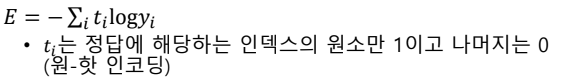

둘의 분포가 동일할 때 최솟값을 가진다.

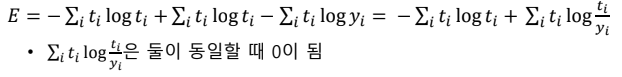

In [5]:
#구현

def cross_entropy_error(y, t):
  delta = 1e-7 #로그 값이 0이 되지 않게 방지함
  return -np.sum(t * np.log(y+delta))

np.log()함수에 0을 입력하면 마이너스 무한대인 -inf가 되어 더 이상 계산을 진행할 수 없기 때문에 아주 작은 값 delta를 더해준다(무한대 발생 방지)

In [6]:
# 정답은 '2'
t = [0,0,1,0,0,0,0,0,0,0]

# 예1 : '2' 확률이 가장 높다고 추정
y = [0.1, 0.05, 0.6, 0, 0.05, 0.1, 0, 0.1, 0, 0]
print(cross_entropy_error(np.array(y), np.array(t)))

# 예2 : '7' 확률이 가장 높다고 추정
y = [0.1, 0.05, 0.1, 0, 0.05, 0.1, 0, 0.6, 0, 0]
print(cross_entropy_error(np.array(y), np.array(t)))

0.510825457099338
2.302584092994546


기계학습은 훈련 데이터에 대한 손실함수의 값을 구하고, 그 값을 최대한 줄여주는 매개변수를 찾는다.

모든 훈련 데이터를 대상으로 손실함수의 값을 계산해야 한다

지금까지는 데이터 하나에 대한 손실 함수만 고려했다. 훈련 데이터 모두에 대한 손실 함수의 값을 구하는 방법

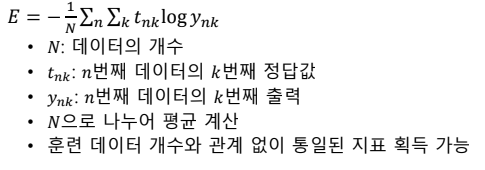

교차 엔트로피 오차 방법을 모든 데이터에 대해 수행한 것이다. (위)

## 미니배치

데이터의 일부를 추려서 전체의 근사치로 이용하는데 여기서의 '일부'가 미니배치이다.

훈련 데이터로부터 일부를 골라 학습을 수행한다.

예를들어 60000개의 훈련 데이터에서 일부 100개를 골라 학습을 수행하면 이 100개가 미니배치이다. 이 과정을 600번 수행하면 모든 훈련데이터에 대해 학습이 가능하다. 이 600회의 훈련 과정을 1 에포크(epoch)라고 한다.


In [12]:
import sys, os
from google.colab import drive
drive.mount('/content/drive')
sys.path.append('/content/drive/MyDrive/컴퓨터공학/빅데이터 분석 교육/2~3')  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
from dataset.mnist import load_mnist

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label = True)

print(x_train.shape)
print(t_train.shape)

train_size = x_train.shape[0]

batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)

print(batch_mask)

x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

print(x_batch.shape)
print(t_batch.shape)

(60000, 784)
(60000, 10)
[40243 12290 16305 45676  8840 12982 20746 56018 55750 27080]
(10, 784)
(10, 10)


In [16]:
#정답 레이블이 원핫 인코딩인 경우

def cross_entropy_error(y, t):
  if y.ndim == 1:
    t = t.reshape(1, t.size)
    y = y.reshape(1, y.size)

  batch_size = y.shape[0]
  return -np.sum(t * np.log(y + 1e-7)) / batch_size

In [17]:
y = np.array([[0.85, 0.14, 0.01], [0.15, 0.84, 0.01], [0.01, 0.01, 0.98]  ])
t = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
print(y.shape)
print(t.shape)

print(cross_entropy_error(y, t))

(3, 3)
(3, 3)
0.1190248950748658


In [21]:
#정답이 원핫인코딩이 아닌 레이블로 주어진 경우

def cross_entropy_error(y, t):
  if y.ndim == 1:
    t = t.reshape(1, t.size)
    y = y.reshape(1, y.size)

  batch_size = y.shape[0]
  return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size #t는 1 또는 0(정답인 경우만 1)이니까
  #정답인 경우의 인덱스에 대해서만 계산하면 되게끔 한다

In [20]:
y = np.array([[0.85, 0.14, 0.01], [0.15, 0.84, 0.01], [0.01, 0.01, 0.98]  ])
t = np.array([0, 1, 2])
print(y.shape)
print(t.shape)

print(cross_entropy_error(y, t))

(3, 3)
(3,)
0.1190248950748658


## 손실함수를 설정하는 이유

매개변수의 학습 시 손실 함수의 값을 가능한 한 작게 하는 값을 찾는다.

이때 매개변수의 미분을 계산하고 미분 값을 단서로 매개변수의 값을 서서히 갱신하는 과정을 반복한다.

미분 값이 음수면 매개변수를 양의 방향으로 변화시켜서 손실 함수를 줄이고, 양수이면 매개변수를 음의 방향으로 변화시켜서 손실 함수를 줄인다. 미분 값이 0이면 매개변수의 갱신이 어렵다.

정확도를 지표로 삼게 되면 정확도가 개선될 시 불연속 적인 값으로 바뀌게 된다 -> 미분 값이 0이 된다

손실함수를 지표로 삼게 되면 연속적으로 값이 변하니까 미분이 가능하다.

계단 함수 사용 대신 시그모이드 함수를 사용하는 이유이다.

### 수치 미분

In [23]:
def numerical_diff(f, x):
  h = 1e-50
  return(f(x+h) - f(x)) / h

위 방법의 문제점 : 작은 값 대입을 위해 사용한 1e-50이 반올림 오차를 발생시켜서 최종 결과에 오차가 발생한다.

또한 h를 무한히 0으로 좁히지 않는 이상 x+h와 x 사이의 기울기를 계산하니까 엄밀하지 못하다.

이 오차를 줄이기 위해 (x+h)와 (x-h)일때의 함수 f의 차분을 계산하는 방법을 사용한다 (중심 차분 또는 중앙 차분)

In [24]:
def numerical_diff(f, x):
  h = 1e-4
  return (f(x+h) - f(x-h)) / (2*h)

In [25]:
def function_1(x):
  return 0.01 * x **2 + 0.1 * x

In [26]:
import matplotlib.pylab as plt

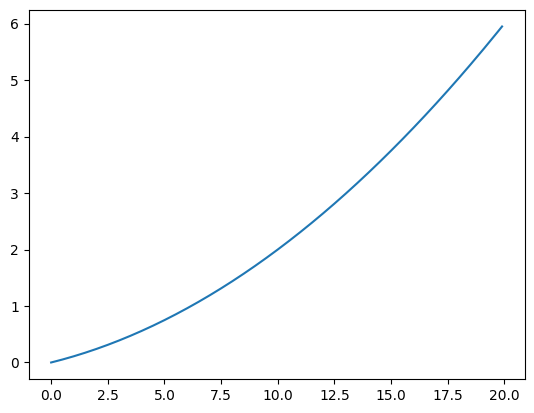

In [27]:
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.plot(x, y)
plt.show()

In [28]:
dif1 = numerical_diff(function_1, 5)
dif2 = numerical_diff(function_1, 10)

print(dif1)
print(dif2)

0.1999999999990898
0.2999999999986347


In [30]:
#f(x0, x1) = x0^2 + x1^2 구현

def function_2(x):
  return x[0]**2 + x[1]**2

x = np.array([1,2])
x_fun2 = function_2(x)
print(x_fun2)

5


### 편미분

In [32]:
#x0 = 3, x1 = 4일때 x0에 대한 편미분

def function_tmp1(x0):
  return x0 * x0 + 4.0**2.0

numerical_diff(function_tmp1, 3.0)

6.00000000000378

In [34]:
#x1 = 4로 고정된 함수를 새로 정의하고 변수가 x0 하나뿐인 함수에 대한 수치미분

def function_tmp2(x1):
  return 3.0**2.0 + x1*x1

numerical_diff(function_tmp2, 4.0)

7.999999999999119

In [36]:
#x0과 x1의 편미분을 동시에 계산하기

def numerical_gradient(f, x):
  h = 1e-4
  grad = np.zeros_like(x)

  for idx in range(x.size):
    tmp_val = x[idx]
    x[idx] = tmp_val + h #f(x+h) 계산
    fxh1 = f(x)

    x[idx] = tmp_val - h #f(x-h) 계산
    fxh2 = f(x)

    grad[idx] = (fxh1 - fxh2) / (2*h)
    x[idx] = tmp_val #값을 복원함
  return grad

In [37]:
def function_2(x):
  return x[0]**2 + x[1]**2

print(numerical_gradient(function_2, np.array([3.0, 4.0])))

print(numerical_gradient(function_2, np.array([0.0, 2.0])))

print(numerical_gradient(function_2, np.array([3.0, 0.0])))

[6. 8.]
[0. 4.]
[6. 0.]


기울기가 가리키는 쪽은 각 위치에서 함수의 출력 값을 가장 크게 줄이는 방향이다.

최적의 매개변수는 손실함수가 최솟값일때이다.

## 경사하강법

현 위치에서 기울어진 방향으로 일정 거리만큼 이동하는 것.

이동한 곳에서 마찬가지로 기울기를 구하고 기울어진 방향으로 이동한다.

이 과정을 반복한다.

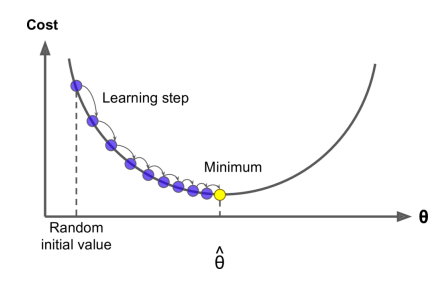

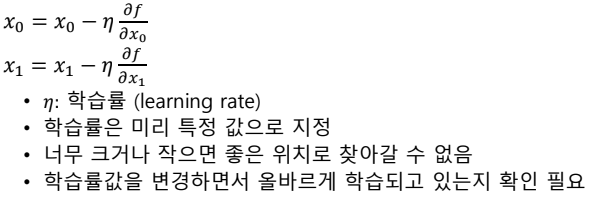

In [39]:
def gradient_descent(f, init_x, lr = 0.01, step_num = 100): # f: 함수, init_x: 초깃값, lr: 학습률, step_num: 반복 횟수
  x = init_x

  for i in range(step_num):
    grad = numerical_gradient(f, x)
    x -= lr * grad

  return x

In [43]:
#f(x0, x1) = x0^2 + x1^2의 최솟값 구하기

init_x = np.array([-3.0, 4.0])
print(gradient_descent(function_2, init_x = init_x, lr = 0.1, step_num = 100))

[-6.11110793e-10  8.14814391e-10]


초깃값을 (-3.0,4.0)으로 설정한 후 경사법을 이용해 최솟값 탐색 수행

최종 결과는 (-6.11110793e-10  8.14814391e-10)으로 거의 (0, 0)에 근접한 결과

아래는 위의 과정을 그림으로 나타냄


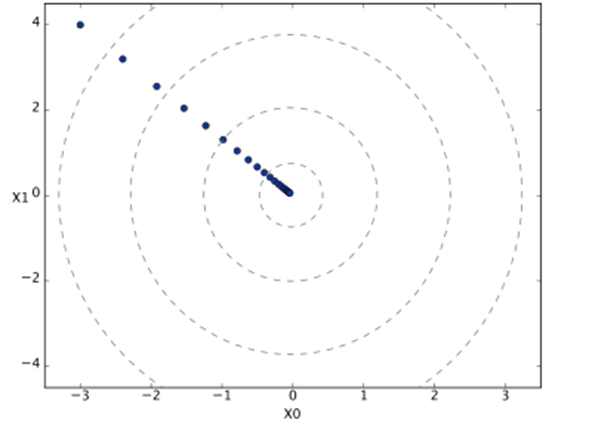

학습률이 너무 크면 큰 값으로 발산한다.

너무 작으면 값이 거의 갱신되지 않는다.

=> 적절한 학습률 설정이 중요하다

- **하이퍼 파라미터** : 사람이 직접 설정해야하는 매개변수. 학습률이 해당된다. 여러 후보 값 중에서 시험을 통해 가장 잘 학습하는 값을 찾는 과정을 거쳐야 한다.

In [42]:
init_x = np.array([-3.0, 4.0])
print(gradient_descent(function_2, init_x=init_x, lr=10.0, step_num=100))

init_x = np.array([-3.0, 4.0])
print(gradient_descent(function_2, init_x=init_x, lr=1e-10, step_num=100))

[-2.58983747e+13 -1.29524862e+12]
[-2.99999994  3.99999992]


## 신경망에서의 기울기

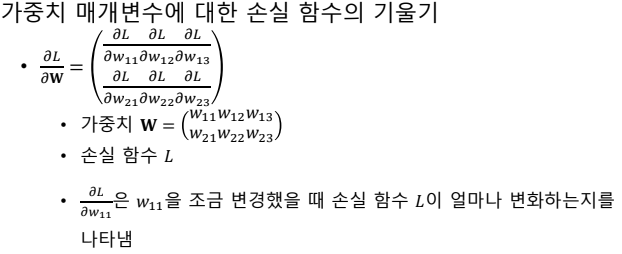

In [50]:
import sys, os
from google.colab import drive
drive.mount('/content/drive')
sys.path.append('/content/drive/MyDrive/컴퓨터공학/빅데이터 분석 교육/4')  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
from common.functions import softmax, cross_entropy_error, sigmoid
from common.gradient import numerical_gradient

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [51]:
class simpleNet:
  def __init__(self):
    self.W = np.random.randn(2, 3) #정규분포로 초기화
  def predict(self, x):
    return np.dot(x, self.W)
  def loss(self, x, t):
    z = self.predict(x)
    y = softmax(z)
    loss = cross_entropy_error(y, t)
    return loss

In [52]:
net = simpleNet()
print(net.W)
x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)
print(np.argmax(p))

t = np.array([0, 0, 1])
print(net.loss(x, t))

def f(W):
  return net.loss(x, t)

dW = numerical_gradient(f, net.W)
print(dW)

[[-1.63139212  1.7222213   0.80957333]
 [ 1.03436772  0.2667831   1.1331058 ]]
[-0.04790432  1.27343757  1.50553922]
2
0.6953365191429056
[[ 0.06331671  0.23733938 -0.30065608]
 [ 0.09497506  0.35600907 -0.45098412]]


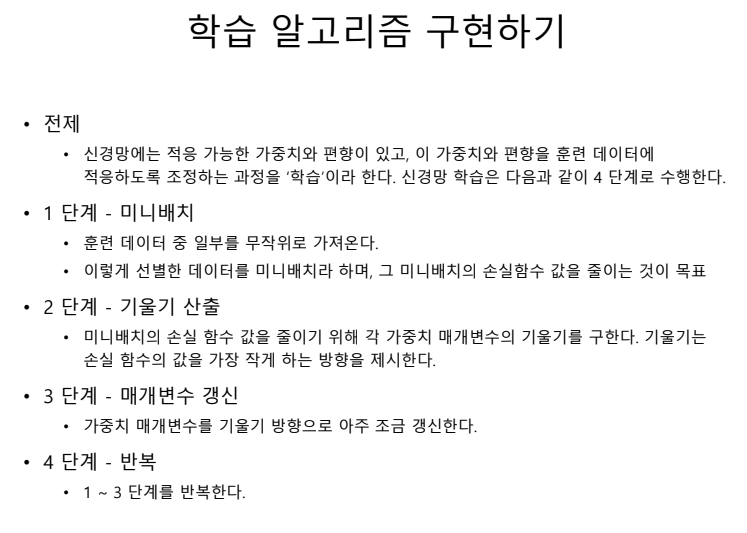

확률적 경사 하강법(SGD)

딥러닝 프레임워크

In [58]:
from binascii import a2b_base64
class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 가중치 초기화
        # 구현
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size) # randn은 평균 0 표준편차 1로 랜덤 변수 생성
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
       # 구현
       W1, W2 = self.params['W1'], self.params['W2']
       b1, b2 = self.params['b1'], self.params['b2']
       a1 = np.dot(x, W1) + b1
       z1 = sigmoid(a1)
       a2 = np.dot(z1, W2) + b2
       y = softmax(a2)
       return y

    # x : 입력 데이터, t : 정답 레이블
    def loss(self, x, t):
        # 구현
        y = self.predict(x)
        return cross_entropy_error(y, t)

    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)

        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy

    # x : 입력 데이터, t : 정답 레이블
    def numerical_gradient_(self, x, t):
      # 구현
      loss_W = lambda W: self.loss(x, t)

      grads = {}
      grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
      grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
      grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
      grads['b2'] = numerical_gradient(loss_W, self.params['b2'])

      return grads


In [54]:
net = TwoLayerNet(input_size = 784, hidden_size = 100, output_size = 10)

print(net.params['W1'].shape)
print(net.params['b1'].shape)
print(net.params['W2'].shape)
print(net.params['b2'].shape)

x = np.random.rand(100, 784)
y = net.predict(x)

t = np.random.rand(100, 10)

grads = net.numerical_gradient_(x, t)

print(grads['W1'].shape)
print(grads['b1'].shape)
print(grads['W2'].shape)
print(grads['b2'].shape)

(784, 100)
(100,)
(100, 10)
(10,)


AttributeError: 'TwoLayerNet' object has no attribute 'parmas'

In [57]:
import sys, os
from google.colab import drive
drive.mount('/content/drive')
sys.path.append('/content/drive/MyDrive/컴퓨터공학/빅데이터 분석 교육/4')  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size = 784, hidden_size = 50, output_size = 10)

# 하이퍼파라미터
iters_num = 10000  # 반복 횟수를 적절히 설정한다.
# iters_num = 100  # 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0]
batch_size = 100   # 미니배치 크기
learning_rate = 0.1

train_acc_list = []
test_acc_list = []

# 1에폭당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    # 미니배치 획득
    # 구현
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    # 기울기 계산
    # 구현
    grad = network.numerical_gradient_(x_batch, t_batch)

    # 매개변수 갱신
    # 구현
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]

    # 학습 경과 기록
    # 구현
    loss = network.loss(x_batch, t_batch)

    # 1에폭당 정확도 계산
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))


# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


AttributeError: 'TwoLayerNet' object has no attribute 'parmas'